# Labelling the dataset

In [1]:
import cv2
import os

data_path='C:/Users/Ferhan/OneDrive/Desktop/dataset'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]
categories=os.listdir(data_path)
print(categories)

for folder in categories:
    myPicList=cv2.imread(data_path+"/"+folder)

label_dict=dict(zip(categories,labels)) #empty dictionary

print(label_dict)
print(categories)
print(labels)

['with mask', 'without mask']
{'with mask': 0, 'without mask': 1}
['with mask', 'without mask']
[0, 1]


# Data Preprocessing

In [2]:
img_size=100
data=[]
target=[]

# For each image in both category folders, we are converting to Grayscale and then resizing
for category in categories:
    folder_path=os.path.join(data_path, category)
    img_names=os.listdir(folder_path)
    
    for img_name in img_names:
        img_path=os.path.join(folder_path, img_name)
        img=cv2.imread(img_path)
        
        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            resized=cv2.resize(gray,(img_size,img_size))
            data.append(resized)
            target.append(label_dict[category])
        except Exception as e:
            print('Exception : ',e)


In [3]:
import numpy as np

# Normalisation
data=np.array(data)/255.0

# Reshaping the data
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

from keras.utils import np_utils
new_target=np_utils.to_categorical(target)

print(data.shape)
print(target.shape)

(1376, 100, 100, 1)
(1376,)


# Saving the data and target

In [4]:
import numpy as np
np.save('data',data)
np.save('target',new_target)

In [5]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')



# Splitting the dataset

In [6]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_target, test_target=train_test_split(data,target, test_size=0.1)

In [7]:
print(train_data.shape)
print(test_data.shape)
print(train_target.shape)
print(test_target.shape)

(1238, 100, 100, 1)
(138, 100, 100, 1)
(1238, 2)
(138, 2)


# Generating Images

In [8]:
from keras.preprocessing.image import ImageDataGenerator

In [9]:
dataGen=ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,zoom_range=0.2,shear_range=0.1,rotation_range=10)

In [10]:
dataGen.fit(train_data)

In [11]:
batches=dataGen.flow(train_data, train_target,batch_size=20)
x_batch,y_batch=next(batches)

In [12]:
x_batch.shape

(20, 100, 100, 1)

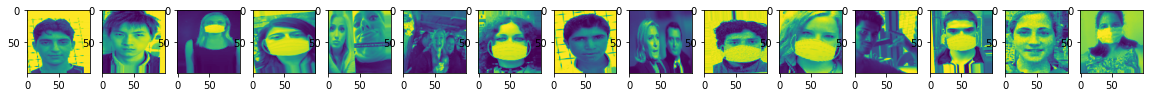

In [13]:
import matplotlib.pyplot as plt

fig,ax=plt.subplots(1,15,figsize=(20,5))
for i in range(15):
    ax[i].imshow(x_batch[i])
plt.show()

# Specifying Architecture

In [14]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(200,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(200,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(200,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(50,activation='relu'))
model.add(Dense(2,activation='softmax'))


# Compilation

In [15]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# Fit

In [16]:
model.fit_generator(dataGen.flow(train_data,train_target,batch_size=20),epochs=15)

<ipython-input-16-a2e0eab02e19>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(dataGen.flow(train_data,train_target,batch_size=20),epochs=15)


Epoch 1/15
62/62 [==============================] - 95s 2s/step - loss: 0.6400 - accuracy: 0.6147
Epoch 2/15
62/62 [==============================] - 93s 1s/step - loss: 0.3693 - accuracy: 0.8465
Epoch 3/15
62/62 [==============================] - 96s 2s/step - loss: 0.2692 - accuracy: 0.8950
Epoch 4/15
62/62 [==============================] - 101s 2s/step - loss: 0.2628 - accuracy: 0.9023
Epoch 5/15
62/62 [==============================] - 103s 2s/step - loss: 0.2686 - accuracy: 0.9015
Epoch 6/15
62/62 [==============================] - 104s 2s/step - loss: 0.1609 - accuracy: 0.9426
Epoch 7/15
62/62 [==============================] - 95s 2s/step - loss: 0.1722 - accuracy: 0.9378
Epoch 8/15
62/62 [==============================] - 95s 2s/step - loss: 0.1308 - accuracy: 0.9540
Epoch 9/15
62/62 [==============================] - 96s 2s/step - loss: 0.1282 - accuracy: 0.9604
Epoch 10/15
62/62 [==============================] - 104s 2s/step - loss: 0.1087 - accuracy: 0.9661
Epoch 11/15
62/

In [17]:
print(model.evaluate(test_data,test_target))

5/5 [==============================] - 3s 621ms/step - loss: 0.0900 - accuracy: 0.9783
[0.08997419476509094, 0.97826087474823]


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 200)       2000      
                                                                 
 activation (Activation)     (None, 98, 98, 200)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 200)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 200)       360200    
                                                                 
 activation_1 (Activation)   (None, 47, 47, 200)       0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 200)      0         
 2D)                                                    

# Saving the trained model

In [19]:
model.save('mask_detection_2.h5')
#model.save('mask_detection_1.model')

# Loading the saved model

In [20]:
from keras.models import load_model
import cv2
import numpy as np
import os

new_model=load_model('mask_detection_2.h5')
#new_model=load_model('mask_detection_1.model')
face_clsfr=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [21]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 200)       2000      
                                                                 
 activation (Activation)     (None, 98, 98, 200)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 200)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 200)       360200    
                                                                 
 activation_1 (Activation)   (None, 47, 47, 200)       0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 200)      0         
 2D)                                                    

# Detecting the mask

In [1]:
source=cv2.VideoCapture(0)
labels_dict={1:'NO MASK',0:'MASK'}
color_dict={0:(0,0,255),1:(0,255,0)}

while(True):
    ret,img=source.read()
    img=cv2.flip(img,1)
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    face_haar_cascade=cv2.CascadeClassifier('C:/Users/Ferhan/OneDrive/Desktop/haarcascade_frontalface_default.xml')
    faces=face_haar_cascade.detectMultiScale(gray,1.3,5)
    
    for x,y,w,h in faces:
        face_img=gray[y:y+w,x:x+w]
        resized=cv2.resize(face_img,(100,100))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,100,100,1))
        result=model.predict(reshaped)
        label=np.argmax(result,axis=1)[0]
        
        cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(img, labels_dict[label], (x,y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
    cv2.imshow('LIVE',img)
    key=cv2.waitKey(1)
    
    if(key==27):
        break
    
cv2.destroyAllWindows()
source.release()
        
        

NameError: name 'cv2' is not defined